In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
from matplotlib import rcParams
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from models_functions import custom_train_test

rcParams['figure.figsize'] = 18, 6

In [2]:
df = pd.read_csv("data/bbas3_info.csv")
df.head()

,Date,BBAS3,SELIC,Cambio,IPCA
0,2017-01-02,8.264061,0.1375,3.2723,0.05354
1,2017-01-03,8.642155,0.1375,3.2626,0.05354
2,2017-01-04,8.597146,0.1375,3.2327,0.05354
3,2017-01-05,8.576143,0.1375,3.2123,0.05354
4,2017-01-06,8.669160,0.1375,3.2051,0.05354


In [3]:
df["Date"] = pd.to_datetime(df["Date"])

In [4]:
df.index = df["Date"]

In [5]:
df["BBAS3 Ontem"] = df['BBAS3'].shift(1)

In [6]:
df.head()

,Date,BBAS3,SELIC,Cambio,IPCA,BBAS3 Ontem
Date,,,,,,
2017-01-02,2017-01-02,8.264061,0.1375,3.2723,0.05354,NaN
2017-01-03,2017-01-03,8.642155,0.1375,3.2626,0.05354,8.264061
2017-01-04,2017-01-04,8.597146,0.1375,3.2327,0.05354,8.642155
2017-01-05,2017-01-05,8.576143,0.1375,3.2123,0.05354,8.597146
2017-01-06,2017-01-06,8.669160,0.1375,3.2051,0.05354,8.576143


In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(1985, 6)

In [24]:
df_train, df_test = custom_train_test(df)

In [21]:
scaler = MinMaxScaler()
y = scaler.fit_transform(df["BBAS3"].values.reshape(-1, 1))
X = scaler.fit_transform(df["BBAS3 Ontem"].values.reshape(-1, 1))

In [26]:
cutoff = len(df_train)
X_train, X_test = X[:cutoff], X[cutoff:]
y_train, y_test = y[:cutoff], y[cutoff:]

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Definir modelo
model = Sequential([
    LSTM(50, activation="tanh", input_shape=(10, 1)),  # 50 neurônios, input = (timesteps=1, features=1)
    # Dense(units=10, activation = 'linear'),
    Dense(1)  # Saída (preço previsto)
])

# 2. Compilar
model.compile(optimizer="adam", loss="mse")  # Otimizador Adam, erro quadrático médio

# 3. Treinar
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/50


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1249 - val_loss: 0.2485
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0303 - val_loss: 0.0860
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0176 - val_loss: 0.0509
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0115 - val_loss: 0.0236
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - val_loss: 0.0055
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - val_loss: 9.0684e-04
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3474e-04 - val_loss: 2.5041e-04
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2622e-04 - val_loss: 4.9336e-04
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2483e-04 - val_loss: 4.4044e-04
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9550e-04 - val_loss: 4.9004e-04
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5837e-04 - val_loss: 4.3831e-04
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s

In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
MAPE: 0.008639767628326306
RMSE: 0.27791445125386494
R²: 0.9326228642985708


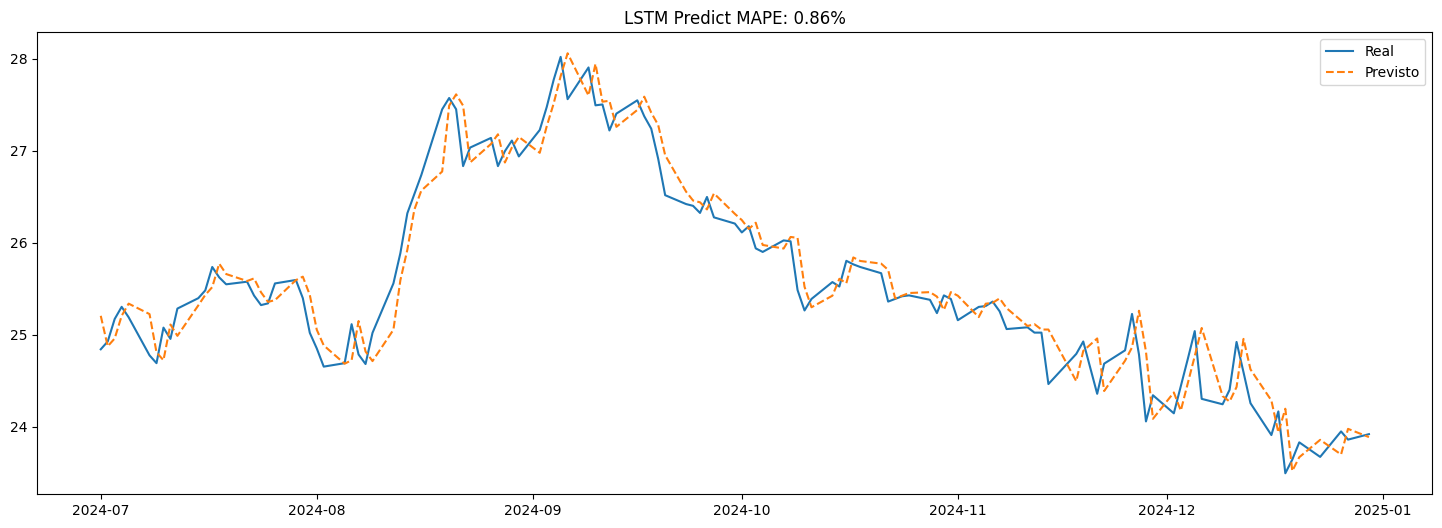

In [37]:
# 1. Prever no conjunto de teste
y_pred = model.predict(X_test)

# 2. Desnormalizar (voltar para escala original)
y_test_real = scaler.inverse_transform(y_test)
y_pred_real = scaler.inverse_transform(y_pred)

# 3. Calcular métricas
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test_real, y_pred_real)
rmse = root_mean_squared_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)

print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# 4. Plotar resultados

plt.plot(df_test.index, y_test_real, label="Real")
plt.plot(df_test.index, y_pred_real, label="Previsto", linestyle="--")
plt.legend()
plt.title(f'LSTM Predict MAPE: {mape * 100:.2f}%')
plt.show()

In [38]:
"""train_results = pd.DataFrame({
    "Real": y_train_real,
    "Previsto": y_pred_train_real
})
"""
test_results = pd.DataFrame({
    "Real": y_test_real.reshape(-1),
    "Previsto": y_pred_real.reshape(-1)
})

#all_results = pd.concat(train_results, test_results, axis=0)

In [39]:
test_results

,Real,Previsto
0,24.840874,25.204966
1,24.925688,24.873613
2,25.170704,24.958834
3,25.302633,25.204966
4,25.189550,25.337460
...,...,...
122,23.829037,23.667122
123,23.670704,23.856279
124,23.947786,23.696993
125,23.858725,23.975729
